<a href="https://colab.research.google.com/github/partha1189/machine_learning/blob/tf_2.0_practice/CNN_Sign_Language.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!pwd

/content


In [3]:
!ls -l ./data

total 102604
-rw-r--r-- 1 root root 21777485 Oct  1 03:34 sign_mnist_test.csv
-rw-r--r-- 1 root root 83281065 Oct  1 03:36 sign_mnist_train.csv


In [4]:
def get_data(filename):
  images = []
  labels = []
  with open(filename) as training_file:
    reader = csv.reader(training_file, delimiter=',')
    next(reader)
    for row in reader:
      label = row[0]
      labels.append(label)
      #labels.append( np.array(row[0]).astype('int'))
      image = row[1:785]
      images_data_as_array = np.array_split(image, 28)
      #image = np.array_split(image, 28)
      #image = np.array(image)#.astype('float')
      #print(image.shape)
      images.append(images_data_as_array)
    imgs = np.array(images).astype('float')
    #imgs = np.array_split(imgs, 28)    
    print(type(labels))
    print(type(imgs)) 
  return imgs,np.array(labels).astype('float')

In [5]:
training_images, training_labels = get_data('./data/sign_mnist_train.csv')
testing_images, testing_labels = get_data('./data/sign_mnist_test.csv')

<class 'list'>
<class 'numpy.ndarray'>
<class 'list'>
<class 'numpy.ndarray'>


In [6]:
type(training_images)

numpy.ndarray

In [7]:
training_images.shape

(27455, 28, 28)

In [8]:
training_images = np.expand_dims(training_images, axis = -1)
testing_images = np.expand_dims(testing_images, axis = -1)

In [9]:
training_images.shape

(27455, 28, 28, 1)

In [10]:
training_images[0].shape

(28, 28, 1)

In [11]:
train_datagen = ImageDataGenerator(rescale=1/255.0,
                                   rotation_range = 10,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   zoom_range = 0.2,
                                   shear_range = 0.2,
                                   horizontal_flip = True
                                   )

In [12]:
validation_datagen = ImageDataGenerator(
    rescale=1/255.0)

In [13]:
print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [14]:
model = tf.keras.models.Sequential([
   tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape = (28, 28, 1)),
   tf.keras.layers.MaxPool2D(2, 2),
   tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
   tf.keras.layers.MaxPool2D(2, 2),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(512, activation='relu'),
   tf.keras.layers.Dropout(0.2),
   tf.keras.layers.Dense(26, activation='softmax')                                   
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               819712    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0

In [16]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [17]:
train_datagen.fit(training_images)
validation_datagen.fit(testing_images)

In [18]:
history = model.fit(train_datagen.flow(training_images, training_labels, batch_size=32), steps_per_epoch = len(training_images)/32, epochs=25, validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32), validation_steps = len(testing_images)/32,verbose=2)

model.evaluate(testing_images, testing_labels)

Epoch 1/25
858/857 - 8s - loss: 2.4819 - accuracy: 0.2359 - val_loss: 1.4336 - val_accuracy: 0.5007
Epoch 2/25
858/857 - 8s - loss: 1.4865 - accuracy: 0.5147 - val_loss: 0.8650 - val_accuracy: 0.6893
Epoch 3/25
858/857 - 8s - loss: 1.1030 - accuracy: 0.6326 - val_loss: 0.5785 - val_accuracy: 0.7904
Epoch 4/25
858/857 - 8s - loss: 0.8844 - accuracy: 0.7050 - val_loss: 0.4741 - val_accuracy: 0.8451
Epoch 5/25
858/857 - 8s - loss: 0.7502 - accuracy: 0.7479 - val_loss: 0.4087 - val_accuracy: 0.8677
Epoch 6/25
858/857 - 8s - loss: 0.6455 - accuracy: 0.7827 - val_loss: 0.2799 - val_accuracy: 0.9098
Epoch 7/25
858/857 - 8s - loss: 0.5685 - accuracy: 0.8081 - val_loss: 0.2687 - val_accuracy: 0.9092
Epoch 8/25
858/857 - 8s - loss: 0.5101 - accuracy: 0.8302 - val_loss: 0.2078 - val_accuracy: 0.9357
Epoch 9/25
858/857 - 8s - loss: 0.4605 - accuracy: 0.8473 - val_loss: 0.1637 - val_accuracy: 0.9498
Epoch 10/25
858/857 - 8s - loss: 0.4222 - accuracy: 0.8590 - val_loss: 0.1412 - val_accuracy: 0.9518

[51.80439376831055, 0.8750697374343872]

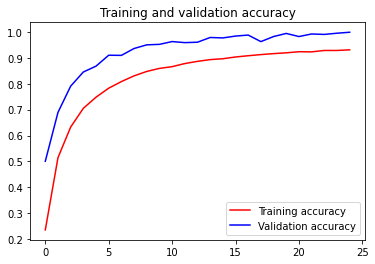

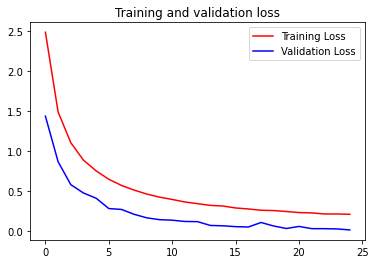

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()